In [1]:
%pylab inline
import sys
sys.path.insert(1, "/global/u2/b/benjikan/.local/lib/python3.8/site-packages")
import uproot
#import numpy as np
#import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
import random

In [3]:
from scipy.stats import norm

In [6]:
print(sys.path)

['/global/cscratch1/sd/benjikan/desi', '/global/u2/b/benjikan/.local/lib/python3.8/site-packages', '/global/u2/b/benjikan/.local/lib/python3.8/site-packages', '', '/opt/mods/lib/python3.6/site-packages', '/opt/ovis/lib/python3.6/site-packages', '/usr/common/software/python/3.7-anaconda-2019.10/lib/python37.zip', '/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7', '/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/lib-dynload', '/global/homes/b/benjikan/.local/lib/python3.7/site-packages', '/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages', '/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/buildtest-0.8.0-py3.7.egg', '/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/distro-1.4.0-py3.7.egg', '/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/PyYAML-5.3.1-py3.7-linux-x86_64.egg', '/global/common/cori_cle7/software/python/3.7-anaconda-2019.10/lib/python3

In [5]:
import random
import awkward as ak
# import awkward0 as ak
from functools import reduce

ModuleNotFoundError: No module named 'awkward._ext'

## Load data files

mc sets

In [4]:
s500_dm100_file =  uproot.open("mc_392942.SlepSlep_direct_500p0_100p0_2L8.exactly2lep.root")

In [5]:
s600_dm1_file =  uproot.open("mc_392982.SlepSlep_direct_600p0_1p0_2L8.exactly2lep.root")

In [6]:
s700_dm1_file = uproot.open("mc_392996.SlepSlep_direct_700p0_1p0_2L8.exactly2lep.root")

In [7]:
sets = [s500_dm100_file, s600_dm1_file, s700_dm1_file]

data

In [8]:
data_file = uproot.open("data_A.exactly2lep.root")

In [12]:
# Check out what is inside of the file
for eNum, event in data_file.items():
    print("Tree Name: {}".format(eNum))
    print("Branches")
    print("-------------")
    for tName, tree in event.items():
        print(tName)
        for bName, branch in tree.items():
            print(branch.keys())
    print("-------------")

Tree Name: mini;1
Branches
-------------
runNumber
eventNumber
channelNumber
mcWeight
scaleFactor_PILEUP
scaleFactor_ELE
scaleFactor_MUON
scaleFactor_PHOTON
scaleFactor_TAU
scaleFactor_BTAG
scaleFactor_LepTRIGGER
scaleFactor_PhotonTRIGGER
trigE
trigM
trigP
lep_n
lep_truthMatched
lep_trigMatched
lep_pt
lep_eta
lep_phi
lep_E
lep_z0
lep_charge
lep_type
lep_isTightID
lep_ptcone30
lep_etcone20
lep_trackd0pvunbiased
lep_tracksigd0pvunbiased
met_et
met_phi
jet_n
jet_pt
jet_eta
jet_phi
jet_E
jet_jvt
jet_trueflav
jet_truthMatched
jet_MV2c10
photon_n
photon_truthMatched
photon_trigMatched
photon_pt
photon_eta
photon_phi
photon_E
photon_isTightID
photon_ptcone30
photon_etcone20
photon_convType
tau_n
tau_pt
tau_eta
tau_phi
tau_E
tau_isTightID
tau_truthMatched
tau_trigMatched
tau_nTracks
tau_BDTid
ditau_m
lep_pt_syst
met_et_syst
jet_pt_syst
photon_pt_syst
tau_pt_syst
XSection
SumWeights
largeRjet_n
largeRjet_pt
largeRjet_eta
largeRjet_phi
largeRjet_E
largeRjet_m
largeRjet_truthMatched
largeRjet_D2


In [19]:
tree    = 'mini;1'
branch  = 'lep_phi'
phi_data = np.array(data_file[tree][branch])
print(len(phi_data))
# print(phi_data[0].dtype)
phi_data = np.array([i for i in phi_data])
phi_data.dtype

664613
float32


dtype('float32')

background

In [9]:
b_ZZ_qqll = uproot.open("mc_363356.ZqqZll.exactly2lep.root")

In [10]:
b_WZ_qqll = uproot.open("mc_363358.WqqZll.exactly2lep.root")

In [11]:
b_dib_llvv = uproot.open("mc_363492.llvv.exactly2lep.root")

In [12]:
b_tt = uproot.open("mc_410000.ttbar_lep.exactly2lep.root")

In [13]:
bg = [b_ZZ_qqll, b_WZ_qqll, b_dib_llvv, b_tt]

extra background

In [684]:
#b_WW_qqlv = uproot.open("mc_363359.WpqqWmlv.exactly2lep.root")

In [685]:
#b_WW_lvqq = uproot.open("mc_363360.WplvWmqq.exactly2lep.root")

In [686]:
#b_WZ_lvqq = uproot.open("mc_363489.WlvZqq.exactly2lep.root")

In [689]:
# e_bg = [b_WW_qqlv, b_WW_lvqq, b_WZ_lvqq]

In [96]:
#files_1 = [data_file, s500_dm1_file]
#files_2 = [data_file, s100_dm50_file]
#files_3 = [data_file, s200_dm100_file]

In [15]:
#files_1.extend(bg)
#files_2.extend(bg)
#files_3.extend(bg)
allfiles = [data_file]
allfiles.extend(sets)
allfiles.extend(bg)

## Functions

In [14]:
SMALL_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', linewidth = 3)
plt.rc('figure', figsize= (7, 5))

In [15]:
def make_fig(xTitle="xTitle",yTitle="yTitle"):
    fig = plt.figure()
    ax = plt.gca()
    ax.set_prop_cycle(color=['#002BFF','#A15FFF','#FF0061','#FF8913', '#03506f', '#ff8e71', '#d8ac9c'])
    ax.set_xlabel(xTitle,labelpad=6)
    ax.set_ylabel(yTitle)
    ax.tick_params(direction='out', length=8, width=2)
    ax.yaxis.offsetText.set_fontsize(10)
    #ax.xaxis.labelpad = 15
    #ax.yaxis.labelpad = 15
    ax.tick_params(axis='both', which='major', labelsize=15)
    figsize = (7,3)
    return fig, ax

Old
def mt2(file, mdm, indices = None):
    mets = file[b'mini;1'].array(b'met_et')
    mets_phi = file[b'mini;1'].array(b'met_phi')
    lep_pt = file[b'mini;1'].array(b'lep_pt')
    lep_eta = file[b'mini;1'].array(b'lep_eta')
    lep_e = file[b'mini;1'].array(b'lep_E')
    lep_phi = file[b'mini;1'].array(b'lep_phi')
    if indices is not None:
        mets = np.take(mets, indices)
        mets = ak.fromiter(mets)
        mets_phi = np.take(mets_phi, indices)
        mets_phi = ak.fromiter(mets_phi)
        lep_pt = np.take(lep_pt, indices)
        lep_pt = ak.fromiter(lep_pt)
        lep_eta = np.take(lep_eta, indices)
        lep_eta = ak.fromiter(lep_eta)
        lep_phi = np.take(lep_phi, indices)
        lep_phi = ak.fromiter(lep_phi)
        lep_e = np.take(lep_e, indices)
        lep_e = ak.fromiter(lep_e)

    lep_p = np.multiply(lep_pt, np.cosh(lep_eta))
    mpts = np.sqrt(mets**2 - mdm**2)
    lep_et = lep_e*(lep_pt/lep_p)
    
    splittings_mag = []
    for mpt in mpts: # for each event, create 10 splittings
        splittings_mag.append(np.linspace(0, mpt, 10))
    s_phi = np.linspace(0, 2*pi, 10)
    
    mt2 = []
    for i, qs in enumerate(splittings_mag):
        #print(i)
        max_mtq = []
        for q in qs:
            eq = np.sqrt(q**2 + mdm**2)
            vec_mpt = np.array([[mpts[i]*np.cos(mets_phi[i]), mpts[i]*np.sin(mets_phi[i])]]*len(s_phi))
            vec_q = np.column_stack([q*np.cos(s_phi), q*np.sin(s_phi)])
            vec_minq = np.array(vec_mpt - vec_q)
            vec_lep1 = np.array([[lep_pt[i][0]*np.cos(lep_phi[i][0]), lep_pt[i][0]*np.sin(lep_phi[i][0])]]*len(s_phi))
            vec_lep2 = np.array([[lep_pt[i][1]*np.cos(lep_phi[i][1]), lep_pt[i][1]*np.sin(lep_phi[i][1])]]*len(s_phi))
            eqmin = np.sqrt(np.array([sum(x) for x in np.multiply(vec_minq, vec_minq)]) + mdm**2)
            
            p1qt = np.array([sum(x) for x in np.multiply(vec_q, vec_lep1)])
            p2mqt = np.array([sum(x) for x in np.multiply(vec_minq, vec_lep2)])
            
            mtalpha = np.sqrt(2*(lep_et[i][0]*eq - p1qt))
            mtbeta =  np.sqrt(2*(lep_et[i][1]*eqmin - p2mqt))
            #mtalpha = np.where(np.isnan(mtalpha), -1, mtalpha)
            #mtbeta = np.where(np.isnan(mtbeta), -1, mtbeta)
            
            max_mtq.append(np.where(mtalpha >= mtbeta, mtalpha, mtbeta))
        max_mtq = np.array(max_mtq)
        mask = (np.isnan(max_mtq))
        max_mtq[mask] = -1
        max_mtq[mask] = np.max(max_mtq)+1
        mt2.append(np.min(max_mtq))
    return np.array(mt2)

def filter_slep(file, mdm):
    lep_type = file[b'mini;1'].array(b'lep_type')
    lep_char = file[b'mini;1'].array(b'lep_charge')
    mets = file[b'mini;1'].array(b'met_et')
    jets = file[b'mini;1'].array(b'jet_n')
    photons = file[b'mini;1'].array(b'photon_n')
    Rjet = file[b'mini;1'].array(b'largeRjet_n')
    taus = file[b'mini;1'].array(b'tau_n')
    
    lep_ts = np.array([np.sum(lt) for lt in lep_type]) # lepton types
    lep_cs = np.array([np.sum(ls) for ls in lep_char]) # lepton charges
    #njets = np.array([np.sum(j) for j in jets])
    
    ind1 = np.where(mets >= mdm)[0]
    ind2 = np.where(lep_ts != 24)[0]
    ind3 = np.where(lep_cs == 0)[0]
    ind4 = np.where(jets == 0)[0]
    ind5 = np.where(photons == 0)[0] # no photons?
    ind6 = np.where(Rjet == 0)[0]
    ind7 = np.where(taus == 0)[0]
    indices = reduce(np.intersect1d, (ind1, ind2, ind3, ind4, ind5, ind6, ind7))
    return indices

In [36]:
np.take(phi_data, (0, 1, 2, 3))
np.multiply(extract_branch(data_file, 'lep_pt'), np.cosh(extract_branch(data_file, 'lep_eta')))

array([[147913.45 ,  21271.793],
       [ 42967.836,  55135.395],
       [ 35314.3  , 126647.13 ],
       ...,
       [153971.53 ,  54370.746],
       [ 30353.84 ,  13895.435],
       [382260.84 , 242830.03 ]], dtype=float32)

In [16]:
def extract_branch(file, branchname):
    branchtemp = np.array(file['mini;1'][branchname])
    branchtemp = np.array([i for i in branchtemp])
    return branchtemp

In [17]:
def mt2(file, mdm, indices = None):
    mets = extract_branch(file, 'met_et')
    mets_phi = extract_branch(file, 'met_phi')
    lep_pt = extract_branch(file, 'lep_pt')
    lep_eta = extract_branch(file, 'lep_eta')
    lep_e = extract_branch(file, 'lep_E')
    lep_phi = extract_branch(file, 'lep_phi')
    if indices is not None:
        mets = np.take(mets, indices, axis=0)
        # mets = ak.fromiter(mets)
        mets_phi = np.take(mets_phi, indices, axis=0)
        # mets_phi = ak.fromiter(mets_phi)
        lep_pt = np.take(lep_pt, indices, axis=0)
        # lep_pt = ak.fromiter(lep_pt)
        lep_eta = np.take(lep_eta, indices, axis=0)
        # lep_eta = ak.fromiter(lep_eta)
        lep_phi = np.take(lep_phi, indices, axis=0)
        # lep_phi = ak.fromiter(lep_phi)
        lep_e = np.take(lep_e, indices, axis=0)
        # lep_e = ak.fromiter(lep_e)

    lep_p = np.multiply(lep_pt, np.cosh(lep_eta))
    mpts = np.sqrt(mets**2 - mdm**2)
    lep_et = lep_e*(lep_pt/lep_p)
    
    splittings_mag = []
    for mpt in mpts: # for each event, create 10 splittings
        splittings_mag.append(np.linspace(0, mpt, 10))
    s_phi = np.linspace(0, 2*pi, 10)
    
    print(np.shape(splittings_mag))
    
    mt2 = []
    for i, qs in enumerate(splittings_mag):
        #print(i)
        max_mtq = []
        for q in qs:
            eq = np.sqrt(q**2 + mdm**2)
            vec_mpt = np.array([[mpts[i]*np.cos(mets_phi[i]), mpts[i]*np.sin(mets_phi[i])]]*len(s_phi))
            vec_q = np.column_stack([q*np.cos(s_phi), q*np.sin(s_phi)])
            vec_minq = np.array(vec_mpt - vec_q)
            # print(lep_pt)
            # print(lep_pt[i])
            vec_lep1 = np.array([[lep_pt[i][0]*np.cos(lep_phi[i][0]), lep_pt[i][0]*np.sin(lep_phi[i][0])]]*len(s_phi))
            vec_lep2 = np.array([[lep_pt[i][1]*np.cos(lep_phi[i][1]), lep_pt[i][1]*np.sin(lep_phi[i][1])]]*len(s_phi))
            eqmin = np.sqrt(np.array([sum(x) for x in np.multiply(vec_minq, vec_minq)]) + mdm**2)
            
            p1qt = np.array([sum(x) for x in np.multiply(vec_q, vec_lep1)])
            p2mqt = np.array([sum(x) for x in np.multiply(vec_minq, vec_lep2)])
            
            mtalpha = np.sqrt(2*(lep_et[i][0]*eq - p1qt))
            mtbeta =  np.sqrt(2*(lep_et[i][1]*eqmin - p2mqt))
            #mtalpha = np.where(np.isnan(mtalpha), -1, mtalpha)
            #mtbeta = np.where(np.isnan(mtbeta), -1, mtbeta)
            
            max_mtq.append(np.where(mtalpha >= mtbeta, mtalpha, mtbeta))
        max_mtq = np.array(max_mtq)
        mask = (np.isnan(max_mtq))
        max_mtq[mask] = -1
        max_mtq[mask] = np.max(max_mtq)+1
        mt2.append(np.min(max_mtq))
    return np.array(mt2)

In [18]:
def filter_slep(file, mdm):
    lep_type = extract_branch(file, 'lep_type')
    lep_char = extract_branch(file, 'lep_charge')
    mets = extract_branch(file, 'met_et')
    jets = extract_branch(file, 'jet_n')
    photons = extract_branch(file, 'photon_n')
    Rjet = extract_branch(file, 'largeRjet_n')
    taus = extract_branch(file, 'tau_n')
    
    lep_ts = np.array([np.sum(lt) for lt in lep_type]) # lepton types
    lep_cs = np.array([np.sum(ls) for ls in lep_char]) # lepton charges
    #njets = np.array([np.sum(j) for j in jets])
    
    ind1 = mets >= mdm #np.where(mets >= mdm)[0]
    ind2 = lep_ts != 24 #np.where(lep_ts != 24)[0]
    ind3 = lep_cs == 0 #np.where(lep_cs == 0)[0]
    ind4 = jets == 0 #np.where(jets == 0)[0]
    ind5 = photons == 0 #np.where(photons == 0)[0] # no photons?
    ind6 = Rjet == 0 #np.where(Rjet == 0)[0]
    ind7 = taus == 0 #np.where(taus == 0)[0]
    # print(ind1)
    indices = ind1 & ind2 & ind3 & ind4 & ind5 & ind6 & ind7 # indices = reduce(np.intersect1d, (ind1, ind2, ind3, ind4, ind5, ind6, ind7))
    return np.argwhere(indices)

In [19]:
lumi=10
def get_N(file):
    return lumi*1000*extract_branch(file, 'XSection')/extract_branch(file, 'SumWeights')

In [20]:
def get_pval(ratios, errors):
    pvals = []
    for i, rat in enumerate(ratios):
        if rat == 0:
            pvals.append(0)
        else:
            z = (rat - 1)/errors[i]
            if z < 0:
                pvals.append(norm.cdf(z))
            else:
                pvals.append(1-norm.cdf(z))
    return pvals

## Analysis of MC datasets

Look at MET distribution of MC datasets.

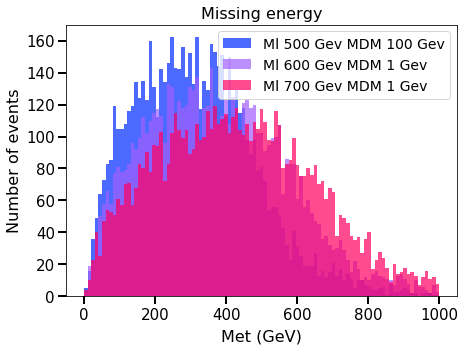

In [21]:
make_fig("Met (GeV)", "Number of events")
title("Missing energy")
nbins   = 100 # number of bins in histogram
xlow    = 0
xhigh   = 1000
bins    = np.linspace(xlow, xhigh, nbins)
for i in range(len(sets)):
    n, bins, patches = plt.hist(extract_branch(sets[i], 'met_et')/1e3, bins, alpha = 0.7)
legend(["Ml 500 Gev MDM 100 Gev", "Ml 600 Gev MDM 1 Gev", "Ml 700 Gev MDM 1 Gev"])
#sets = [s500_dm100_file, s300_dm200_file, s400_dm300_file]

We build something called "stransverse mass". Recall regular transverse mass for a 1-> 2 decay:
\begin{align}
m_T = \sqrt{2 (E_{T1}E_{T2} - \mathbf{p_{T1}\cdot p_{T2}})}
\end{align}
or 
\begin{align}
m_T = \sqrt{2 (E_{T1}E_{T2} - |p_{T1}||p_{T2}|\cos(\Delta \phi)}
\end{align}
Where 
\begin{align}
E_T = E\frac{|p_T|}{|p|}
\end{align}
and
\begin{align}
m_T \leq m
\end{align}

Here, we have two $\tilde l-> l + DM$, where the $DM$ goes into $MET$. However, we don't know how the $MET$ is split up between the two unknown $DM$ particles, which means we have to split $\mathbf{p_{T}}^{miss}$ into all possible combinations $\mathbf{q_T}$ and $\mathbf{p_{T}}^{miss} - \mathbf{q_T}$. Then, we define the the $m_{T2}$ variable ("stransverse mass") as:
\begin{align}
m_{T2} = \text{min}_{\mathbf{q_T}}\bigg \{\text{max} \big[m_T(\mathbf{p_T^{\alpha}}, \mathbf{q_T}, MDM), m_T(\mathbf{p_T^{\beta}}, \mathbf{p_{T}}^{miss} - \mathbf{q_T}, MDM)]\big]\bigg\}
\end{align}

Where $\alpha$ and $\beta$ indicate the two respective $\tilde{l} -> l + DM$ decays we are looking at.

Note that we assume $|p_T| \approx |p|$.

$m_{T2}$ satisfies the inequality:
\begin{align}
m_{T2}^2 \leq m_{\tilde l}^2 - MDM^2
\end{align}

In [22]:
mt2_sets = []
mdms = [100e3, 1e3, 1e3]
for i, s in enumerate(sets):
    mt2_sets.append(mt2(s, mdms[i]))

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt


(6622, 10)


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in greater_equal


(6744, 10)
(6738, 10)


## Random sampling of data

In [23]:
# getting indices where data + bg survive the filters
cut_ind_dbg = []
for mdm in mdms:
    mdm_dbg = []
    for file in [data_file] + bg:
        mdm_dbg.append(filter_slep(file, mdm))
    cut_ind_dbg.append(mdm_dbg)

In [24]:
SCRATCHdesi = "/global/cscratch1/sd/benjikan/desi/"

In [25]:
np.save(SCRATCHdesi + "cut_ind_dbg_whole_BK2", cut_ind_dbg)

In [26]:
# getting indices where the mc datasets survive filters
cut_ind_sets = []
for i, file in enumerate(sets):
    cut_ind_sets.append(filter_slep(file, mdms[i]))

In [27]:
# getting full sizes of data and background datasets
sizes_databg = []
for file in [data_file] + bg:
    met = extract_branch(file, 'met_et')#file[b'mini;1'].array(b'met_et')
    sizes_databg.append(len(met))

In [28]:
print(sizes_databg)

[664613, 1381845, 1306670, 3389180, 2834261]


In [33]:
70000/664613

0.10532445197430686

In [122]:
# getting indices that are random samples for data + bg for each mdm
rand_samp_databg = []
for j, mdm in enumerate(mdms):
    mdm_samp = []
    for i, file in enumerate([data_file] + bg):
#         if j==0:
#             mdm_samp.append(random.sample(range(0, sizes_databg[i]), 70000))
#         else:
#             mdm_samp.append(random.sample(range(0, sizes_databg[i]), 20000))        
        
        # PROP
        if j==0:
            mdm_samp.append(random.sample(range(0, sizes_databg[i]), int(.105*sizes_databg[i]))) # take 10.5% of events, ~70k data events
        if j==1:
            mdm_samp.append(random.sample(range(0, sizes_databg[i]), int(.03*sizes_databg[i]))) # take 3% of events, ~20k data events
        else:
            mdm_samp.append(random.sample(range(0, sizes_databg[i]), int(.03*sizes_databg[i]))) # take 3% of events, ~20k data events

    rand_samp_databg.append(mdm_samp)

In [123]:
cut_ind_dbg = np.array(cut_ind_dbg)
cut_ind_sets = np.array(cut_ind_sets)
rand_samp_databg = np.array(rand_samp_databg)

In [124]:
# intersecting indices that passed filters with random sample indices
fin_ind_dbg = []
for i in range(len(cut_ind_dbg)):
    mdm_ind = []
    for j in range(len(cut_ind_dbg[0])):
        mdm_ind.append(np.intersect1d(cut_ind_dbg[i][j], rand_samp_databg[i][j]))
    fin_ind_dbg.append(mdm_ind)

In [125]:
fin_ind_dbg = np.array(fin_ind_dbg)

In [126]:
np.save(SCRATCHdesi+"fin_ind_dbg_whole_BK2prop", fin_ind_dbg)

In [83]:
print(fin_ind_dbg[0][0])
print(extract_branch(data_file, 'lep_pt'))
print(np.take(extract_branch(data_file, 'lep_pt'), fin_ind_dbg[0][0], axis=0))

[    30     56    174 ... 664274 664512 664609]
[[ 33144.9    21067.385]
 [ 42871.246  37205.387]
 [ 33070.188  29222.084]
 ...
 [ 39147.01   38326.816]
 [ 27601.549  13892.836]
 [108435.18   91717.31 ]]
[[42287.117 27343.342]
 [53704.32  39473.5  ]
 [47856.98  43398.01 ]
 ...
 [37704.133 37170.074]
 [47667.63  46014.797]
 [47599.27  44566.27 ]]


In [127]:
# calculating mt2 for these indices
mt2_dbg = []
for i in range(len(fin_ind_dbg)):
    mt2_mdm = []
    for j, file in enumerate([data_file] + bg):
        print(f'{i}{j}')
        mt2_mdm.append(mt2(file, mdms[i], fin_ind_dbg[i][j]))
    mt2_dbg.append(mt2_mdm)

00
(24, 10)
01
(0,)
02
(6, 10)
03
(259, 10)
04
(64, 10)
10
(10789, 10)
11
(2305, 10)
12
(3310, 10)
13
(11475, 10)
14
(295, 10)
20
(10914, 10)
21
(2266, 10)
22
(3326, 10)
23
(11624, 10)
24
(325, 10)


In [106]:
print(np.shape(mt2_dbg[0][0]))

(23,)


In [128]:
np.save(SCRATCHdesi + "mt2_dbg_BK2prop", mt2_dbg)

For all data sets, I will make the cuts that the lepton type should be either two muons or two electrons and the sum of the lepton charge should be -1.

In [129]:
weights = ["scaleFactor_MUON", "scaleFactor_ELE", "scaleFactor_PILEUP", "scaleFactor_LepTRIGGER", "mcWeight"]

We want to rescale MC by $\frac{\text{sample data size}}{\text{data size}}\frac{\text{mc size}}{\text{sample mc size}}$. Here, the sample data and sample mc are the same size, so we rescale by mc size/data size.

In [98]:
for i,file in enumerate(sets+bg):
    print(len(rand_samp_databg[i][0]))#/sizes_databg[0]

70000
20000
20000


IndexError: index 3 is out of bounds for axis 0 with size 3

In [100]:
for i,file in enumerate(sets+bg):
    print(sizes_databg[i-2]/sizes_databg[0])

5.099478944889733
4.2645283796735844
1.0
2.0791723905490866
1.966061452303822
5.099478944889733
4.2645283796735844


In [130]:
# weighting
sets_bg_weights = []
for i, file in enumerate(sets + bg):
    e_weight = 1
    N = get_N(file)
    for weight in weights:
        e_weight = e_weight*extract_branch(file, weight)
    
    # prop
    sets_bg_weights.append(e_weight * N)
    
#     if i<=2: # for mc sets
#         sets_bg_weights.append(e_weight * N * len(rand_samp_databg[i][0])/sizes_databg[0]) # for mc sims, normalize by rescale size
#     else: # for background
#         sets_bg_weights.append(e_weight * N * sizes_databg[i-2]/sizes_databg[0]) # for nonsets, normalize by rescale size


In [96]:
for i, file in enumerate(sets+bg):
    print(i)

0
1
2
3
4
5
6


### With selections

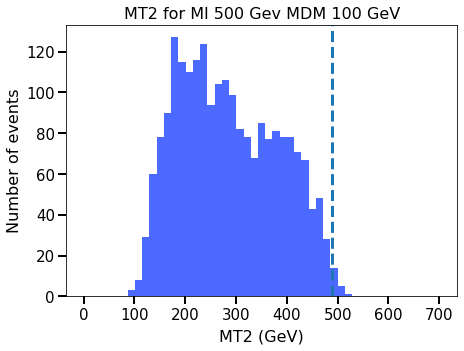

In [131]:
make_fig("MT2 (GeV)", "Number of events")
title("MT2 for Ml 500 Gev MDM 100 GeV")
nbins   = 50 # number of bins in histogram
xlow    = 1
xhigh   = 700
bins    = np.linspace(xlow, xhigh, nbins)
n, bins, patches = plt.hist(np.take(np.array(mt2_sets[0])/1e3, cut_ind_sets[0]), bins, alpha = 0.7)
axvline(np.sqrt(500**2-(mdms[0]/1e3)**2), linestyle = "--")


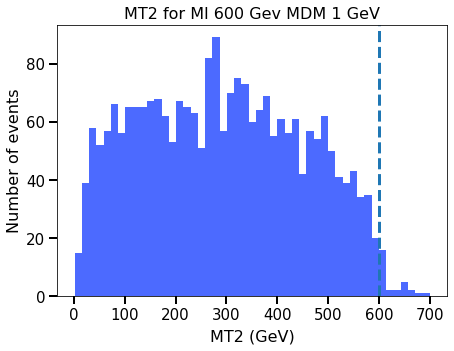

In [132]:
make_fig("MT2 (GeV)", "Number of events")
title("MT2 for Ml 600 Gev MDM 1 GeV")
nbins   = 50 # number of bins in histogram
xlow    = 1
xhigh   = 700
bins    = np.linspace(xlow, xhigh, nbins)
n, bins, patches = plt.hist(np.take(np.array(mt2_sets[1])/1e3, cut_ind_sets[1]), bins, alpha = 0.7)
axvline(np.sqrt(600**2-(mdms[1]/1e3)**2), linestyle = "--")


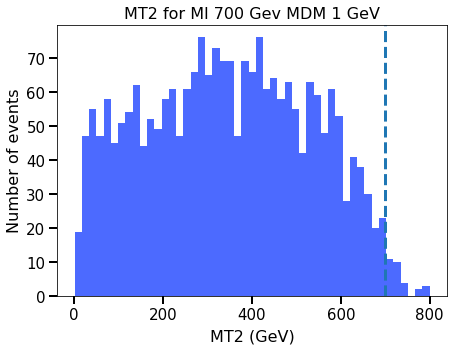

In [133]:
make_fig("MT2 (GeV)", "Number of events")
title("MT2 for Ml 700 Gev MDM 1 GeV")
nbins   = 50 # number of bins in histogram
xlow    = 1
xhigh   = 800
bins    = np.linspace(xlow, xhigh, nbins)
n, bins, patches = plt.hist(np.take(np.array(mt2_sets[2])/1e3, cut_ind_sets[2]), bins, alpha = 0.7)
axvline(np.sqrt(700**2-(mdms[2]/1e3)**2), linestyle = "--")
#legend(["Ml 500 Gev MDM 100 Gev", "Ml 300 Gev MDM 200 Gev", "Ml 400 Gev MDM 300 Gev"])


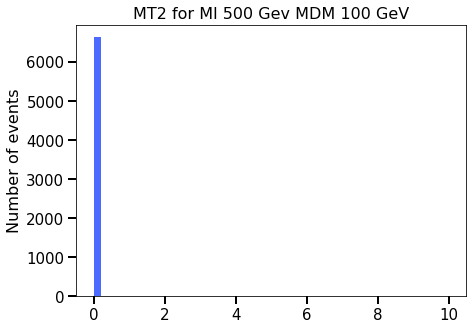

In [77]:
make_fig("", "Number of events")
title("MT2 for Ml 500 Gev MDM 100 GeV")
nbins   = 50 # number of bins in histogram
xlow    = 0
xhigh   = 10
bins    = np.linspace(xlow, xhigh, nbins)
n, bins, patches = plt.hist([sum(lp) for lp in extract_branch(sets[0], 'tau_n')], bins, alpha = 0.7)

In [647]:
sets[0][b'mini;1'].array(b'jet_n')

array([1, 1, 0, ..., 0, 0, 1], dtype=uint32)

## ML 500 GeV, MDM 100 GeV

In [134]:
# getting mt2 values for the mc datasets with appropriately filtered indices
mt2_sets_ind = []
for i, mt2i in enumerate(mt2_sets):
    mt2_sets_ind.append(np.take(mt2i, cut_ind_sets[i]))

In [135]:
# getting mc dataset weights with appropriate indices
sets_weights_ind = []
for i in range(len(sets)):
    sets_weights_ind.append(np.take(sets_bg_weights[i], cut_ind_sets[i]))

In [136]:
print(len(bg))

4


In [137]:
# getting bg weights with appropriate indices
bg_weights_ind = []
for i in range(len(mdms)):
    mdm_bg_weight = []
    for j in range(len(bg)):
        mdm_bg_weight.append(np.take(sets_bg_weights[j+3], fin_ind_dbg[i][j+1]))
    bg_weights_ind.append(mdm_bg_weight)

In [138]:
# mt2 combined background
mt2_bg_comb = [np.concatenate(mt2_dbg[i][1:]) for i in range(len(mt2_dbg))]

In [139]:
#combined background weights
bg_weights_comb = [np.concatenate(bg_weights_ind[i]) for i in range(len(bg_weights_ind))]

In [140]:
nbins   = 50 # number of bins in histogram
xlow    = 50#e3
xhigh   = 600#e3
bins    = np.linspace(xlow, xhigh, nbins)

counts, bin_edges = np.histogram(mt2_dbg[0][0]/1e3, bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.sqrt(counts)
counts = counts

In [141]:
f1 = 1 # already weighted #(1e4)/sizes_databg[0]

In [142]:
print(np.shape(mt2_dbg[0][0]))
print(np.shape(mt2_dbg[0][2]))

(24,)
(6,)


In [133]:
print(bg_weights_ind[0])
bg_weights_ind[0] + [f1*sets_weights_ind[0].flatten()]

[array([-0.00035843, -0.0001819 ,  0.00027823, ...,  0.00017517,
        0.00021634,  0.00018329], dtype=float32), array([ 0.00052918,  0.00029967,  0.00029074, ..., -0.00057587,
        0.00029722, -0.00025396], dtype=float32), array([-0.00133886,  0.        ,  0.00186015, ...,  0.00021961,
        0.00074305,  0.00200394], dtype=float32), array([4.9689254e-03, 3.3105854e-03, 5.5647166e-03, 2.8099886e-03,
       5.4832445e-03, 3.6658549e-03, 5.6123366e-03, 6.6991681e-03,
       4.2423084e-03, 1.2759004e-05, 3.0369267e-03, 5.4401243e-03,
       4.1749398e-03, 4.1085030e-03, 5.4458766e-03, 2.9740904e-03,
       4.1014720e-03, 3.7850710e-03, 5.3518955e-03, 5.3966283e-03,
       2.3626194e-03, 0.0000000e+00, 5.4325224e-03, 5.5606207e-03,
       3.0329896e-03, 2.4038265e-03, 5.8372165e-03, 5.5888961e-03,
       7.7271531e-03, 5.0015566e-03, 2.7381021e-03, 4.6982537e-03,
       6.8336725e-03, 5.5721551e-03, 3.0973770e-03, 7.4392073e-03,
       2.7218424e-03, 1.5451934e-03, 1.6820418e-03, 2.

[array([-0.00035843, -0.0001819 ,  0.00027823, ...,  0.00017517,
         0.00021634,  0.00018329], dtype=float32),
 array([ 0.00052918,  0.00029967,  0.00029074, ..., -0.00057587,
         0.00029722, -0.00025396], dtype=float32),
 array([-0.00133886,  0.        ,  0.00186015, ...,  0.00021961,
         0.00074305,  0.00200394], dtype=float32),
 array([4.9689254e-03, 3.3105854e-03, 5.5647166e-03, 2.8099886e-03,
        5.4832445e-03, 3.6658549e-03, 5.6123366e-03, 6.6991681e-03,
        4.2423084e-03, 1.2759004e-05, 3.0369267e-03, 5.4401243e-03,
        4.1749398e-03, 4.1085030e-03, 5.4458766e-03, 2.9740904e-03,
        4.1014720e-03, 3.7850710e-03, 5.3518955e-03, 5.3966283e-03,
        2.3626194e-03, 0.0000000e+00, 5.4325224e-03, 5.5606207e-03,
        3.0329896e-03, 2.4038265e-03, 5.8372165e-03, 5.5888961e-03,
        7.7271531e-03, 5.0015566e-03, 2.7381021e-03, 4.6982537e-03,
        6.8336725e-03, 5.5721551e-03, 3.0973770e-03, 7.4392073e-03,
        2.7218424e-03, 1.5451934e-03, 1.

(50, 600)

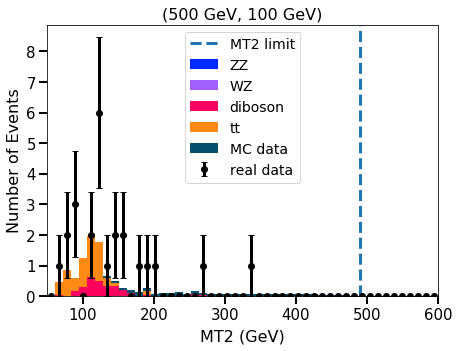

In [143]:
make_fig("MT2 (GeV)", "Number of Events")
title("(500 GeV, 100 GeV)")
#n, bins, patches = plt.hist(mt2_dbg[0][1:] + mt2_ebg[0] + [mt2_sets_ind[0]], \
                #bins, stacked = True, weights = bg_weights_ind[0] \
                #+ [f1*ewi for ewi in ebg_weights_ind[0]] + [f1*sets_weights_ind[0]])
n, bins, patches = plt.hist(np.array(mt2_dbg[0][1:] + [mt2_sets_ind[0]])/1e3, \
                bins, stacked = True, weights = bg_weights_ind[0] + [f1*sets_weights_ind[0].flatten()])
errorbar(bin_centers, counts, yerr = err, capsize=3, fmt = 'o', c = 'black')
ylim(bottom = 0)
axvline(np.sqrt(500**2-(mdms[0]/1e3)**2), linestyle = "--")#axvline(np.sqrt(500e3**2-(mdms[0])**2), linestyle = "--")
legend(["MT2 limit", "ZZ", "WZ", "diboson", "tt", "MC data", "real data"])
xlim(50, 600)#xlim(50e3, 600e3)
#savefig("mdm0plt_1.svg")

(50, 600)

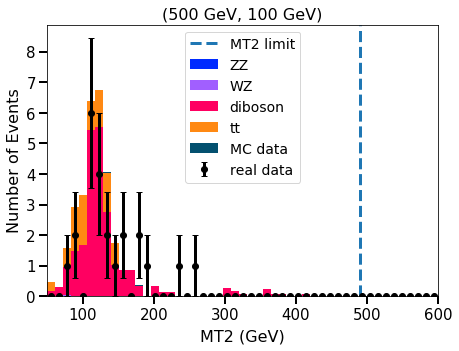

In [121]:
make_fig("MT2 (GeV)", "Number of Events")
title("(500 GeV, 100 GeV)")
#n, bins, patches = plt.hist(mt2_dbg[0][1:] + mt2_ebg[0] + [mt2_sets_ind[0]], \
                #bins, stacked = True, weights = bg_weights_ind[0] \
                #+ [f1*ewi for ewi in ebg_weights_ind[0]] + [f1*sets_weights_ind[0]])
n, bins, patches = plt.hist(np.array(mt2_dbg[0][1:] + [mt2_sets_ind[0]])/1e3, \
                bins, stacked = True, weights = bg_weights_ind[0] + [f1*sets_weights_ind[0].flatten()])
errorbar(bin_centers, counts, yerr = err, capsize=3, fmt = 'o', c = 'black')
ylim(bottom = 0)
axvline(np.sqrt(500**2-(mdms[0]/1e3)**2), linestyle = "--")#axvline(np.sqrt(500e3**2-(mdms[0])**2), linestyle = "--")
legend(["MT2 limit", "ZZ", "WZ", "diboson", "tt", "MC data", "real data"])
xlim(50, 600)#xlim(50e3, 600e3)
#savefig("mdm0plt_1.svg")

(50, 600)

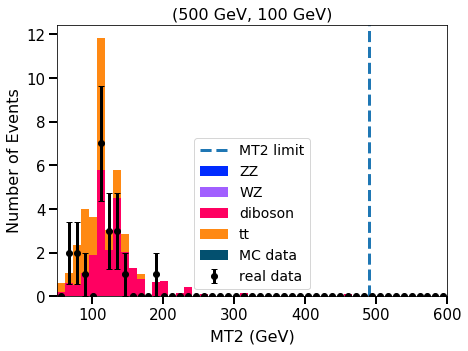

In [89]:
make_fig("MT2 (GeV)", "Number of Events")
title("(500 GeV, 100 GeV)")
#n, bins, patches = plt.hist(mt2_dbg[0][1:] + mt2_ebg[0] + [mt2_sets_ind[0]], \
                #bins, stacked = True, weights = bg_weights_ind[0] \
                #+ [f1*ewi for ewi in ebg_weights_ind[0]] + [f1*sets_weights_ind[0]])
n, bins, patches = plt.hist(np.array(mt2_dbg[0][1:] + [mt2_sets_ind[0]])/1e3, \
                bins, stacked = True, weights = bg_weights_ind[0] + [f1*sets_weights_ind[0].flatten()])
errorbar(bin_centers, counts, yerr = err, capsize=3, fmt = 'o', c = 'black')
ylim(bottom = 0)
axvline(np.sqrt(500**2-(mdms[0]/1e3)**2), linestyle = "--")#axvline(np.sqrt(500e3**2-(mdms[0])**2), linestyle = "--")
legend(["MT2 limit", "ZZ", "WZ", "diboson", "tt", "MC data", "real data"])
xlim(50, 600)#xlim(50e3, 600e3)
#savefig("mdm0plt_1.svg")

In [ ]:
#legend(["Ml 500 Gev MDM 100 Gev", "Ml 300 Gev MDM 200 Gev", "Ml 400 Gev MDM 300 Gev"])

In [144]:
counts_b, bin_edges_b = np.histogram(mt2_bg_comb[0]/1e3, bins, weights = bg_weights_comb[0])

In [145]:
bin_centers_b = (bin_edges_b[:-1] + bin_edges_b[1:])/2.
err_r = np.sqrt(counts)/counts_b
err_r

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([  0.        ,   2.10186543,   1.67014515,   2.86654313,
         0.        ,   0.72076781,   1.39167881,   1.63092704,
         3.18855063,   7.03081037,   0.        ,  52.00495958,
         6.13995866, -33.37607028,   0.        ,          nan,
         0.        ,          nan,   0.        ,  32.0068374 ,
                nan,  -0.        ,          nan,          nan,
                nan, 576.45739417,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan])

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


(50, 600)

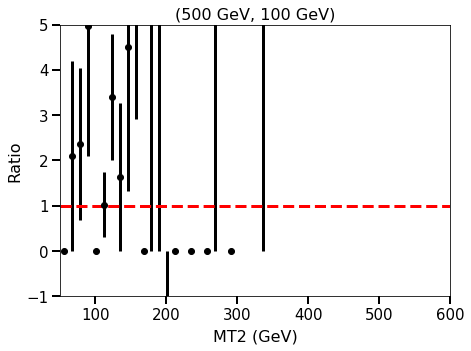

In [146]:
make_fig("MT2 (GeV)", "Ratio")
title("(500 GeV, 100 GeV)")
errorbar(bin_centers, counts/counts_b, yerr = err_r, fmt = 'o', c = "black")
axhline(1, linestyle = "--", c = "r", label = "1")
ylim(-1, 5)
xlim(50, 600)
#legend()
#savefig("mdm0ratio_1.svg")

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


(50, 600)

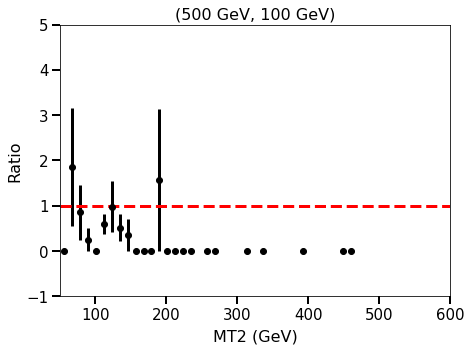

In [110]:
make_fig("MT2 (GeV)", "Ratio")
title("(500 GeV, 100 GeV)")
errorbar(bin_centers, counts/counts_b, yerr = err_r, fmt = 'o', c = "black")
axhline(1, linestyle = "--", c = "r", label = "1")
ylim(-1, 5)
xlim(50, 600)
#legend()
#savefig("mdm0ratio_1.svg")

In [147]:
pvals = np.array(get_pval(counts/counts_b, err_r))

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [148]:
ind_p = np.where((abs(counts/counts_b - 1)>err_r)*(counts != 0)*(counts_b != 0))

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [149]:
(counts/counts_b)[ind_p]

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([  4.96499835,   3.40890298,   4.50929154,   9.94306738,
       -33.37607028])

In [150]:
pvals[ind_p]

array([0.08330199, 0.04173184, 0.13553726, 0.10168968, 0.15151402])

In [114]:
pvals[ind_p]

array([0.00131408, 0.03353497, 0.05403628, 0.0316821 ])

## ML 600 GeV, MDM 1 GeV

In [ ]:
#legend(["Ml 500 Gev MDM 100 Gev", "Ml 300 Gev MDM 200 Gev", "Ml 400 Gev MDM 300 Gev"])


In [154]:
nbins   = 50 # number of bins in histogram
xlow    = 0#e3
xhigh   = 100#e3
bins    = np.linspace(xlow, xhigh, nbins)

counts, bin_edges = np.histogram(mt2_dbg[1][0]/1e3, bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.sqrt(counts)
counts = counts

In [155]:
f2 = 1#(2e4)/sizes_databg[0]

(0, 100)

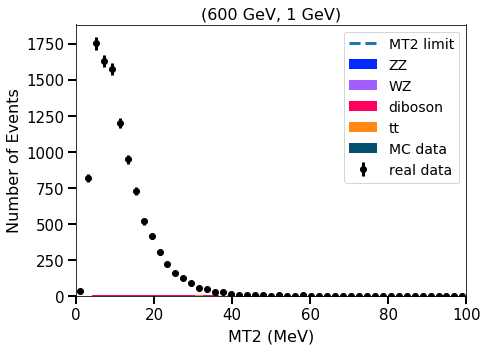

In [156]:
make_fig("MT2 (MeV)", "Number of Events")
title("(600 GeV, 1 GeV)")
#n, bins, patches = plt.hist(mt2_dbg[1][1:] + mt2_ebg[1] + [mt2_sets_ind[1]], \
                #bins, stacked = True, weights = bg_weights_ind[1] \
                #+ [f2*ewi for ewi in ebg_weights_ind[1]] + [f2*sets_weights_ind[1]])
n, bins, patches = plt.hist(np.array(mt2_dbg[1][1:] + [mt2_sets_ind[1]])/1e3, \
                bins, stacked = True, weights = bg_weights_ind[1] + [f2*sets_weights_ind[1]])
errorbar(bin_centers, counts, yerr = err, fmt = 'o', c = 'black')
ylim(bottom = 0)
axvline(np.sqrt(600**2-(mdms[1]/1e3)**2), linestyle = "--")
legend(["MT2 limit","ZZ", "WZ", "diboson", "tt", "MC data", "real data"])
xlim(xlow, xhigh)
#savefig("mdm1plt_1.svg")

(0, 100)

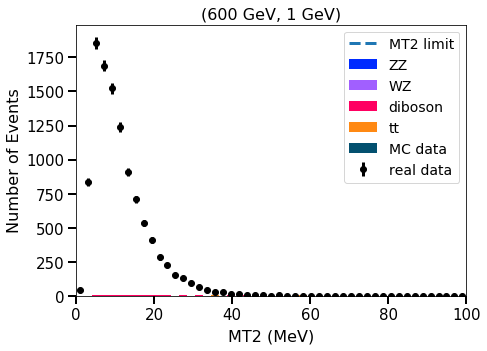

In [70]:
make_fig("MT2 (MeV)", "Number of Events")
title("(600 GeV, 1 GeV)")
#n, bins, patches = plt.hist(mt2_dbg[1][1:] + mt2_ebg[1] + [mt2_sets_ind[1]], \
                #bins, stacked = True, weights = bg_weights_ind[1] \
                #+ [f2*ewi for ewi in ebg_weights_ind[1]] + [f2*sets_weights_ind[1]])
n, bins, patches = plt.hist(np.array(mt2_dbg[1][1:] + [mt2_sets_ind[1]])/1e3, \
                bins, stacked = True, weights = bg_weights_ind[1] + [f2*sets_weights_ind[1]])
errorbar(bin_centers, counts, yerr = err, fmt = 'o', c = 'black')
ylim(bottom = 0)
axvline(np.sqrt(600**2-(mdms[1]/1e3)**2), linestyle = "--")
legend(["MT2 limit","ZZ", "WZ", "diboson", "tt", "MC data", "real data"])
xlim(xlow, xhigh)
#savefig("mdm1plt_1.svg")

In [71]:
counts_b, bin_edges_b = np.histogram(mt2_bg_comb[1]/1e3, bins, weights = bg_weights_comb[1])
bin_centers_b = (bin_edges_b[:-1] + bin_edges_b[1:])/2.
err_r = np.sqrt(counts)/counts_b

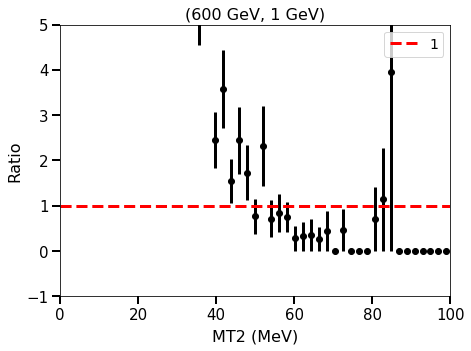

In [72]:
make_fig("MT2 (MeV)", "Ratio")
title("(600 GeV, 1 GeV)")
errorbar(bin_centers, counts/counts_b, yerr = err_r, fmt = 'o', c = "black")
axhline(1, linestyle = "--", c = "r", label = "1")
ylim((-1, 5))
xlim((0, 100))
legend()
#savefig("mdm1ratio.svg")

In [73]:
pvals = np.array(get_pval(counts/counts_b, err_r))

In [74]:
ind_p = np.where((abs(counts/counts_b - 1)>err_r)*(counts != 0)*(counts_b != 0))

In [75]:
(counts/counts_b)[ind_p]

array([124.20142841, 181.61074011, 200.19899793, 191.47596567,
       184.00788931, 210.82528932, 110.21877069,  82.96308714,
        74.60205276,  62.35661303,  35.1775484 ,  33.50651804,
        26.93155674,  17.67400954,  20.01697099,   9.70017875,
        10.59244458,   5.4827919 ,   7.79968038,   2.45408787,
         3.57038783,   1.53576976,   2.44075819,   1.72682517,
         2.31929699,   0.27850271,   0.32549375,   0.3546397 ,
         0.2670342 ,   0.43783254,   0.46535588])

In [76]:
ind_p

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 25, 29, 30, 31, 32, 33, 35]),)

In [77]:
pvals[ind_p]

array([5.21438448e-12, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.58983937e-13,
       1.43934020e-09, 6.58891789e-07, 1.85404714e-07, 8.89244269e-03,
       1.49726182e-03, 1.34971356e-01, 2.51282349e-02, 1.16926482e-01,
       6.61626050e-02, 4.79003064e-03, 1.91208055e-02, 3.43975332e-02,
       3.02703259e-03, 9.95747785e-02, 1.25300045e-01])

## ML 700 GeV, MDM 1 GeV

In [157]:
nbins   = 50 # number of bins in histogram
xlow    = 0#e3
xhigh   = 100#e3
bins    = np.linspace(xlow, xhigh, nbins)

counts, bin_edges = np.histogram(mt2_dbg[2][0]/1e3, bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.sqrt(counts)
counts = counts

In [158]:
f3 = 1#(10e4)/sizes_databg[0]

(0, 100)

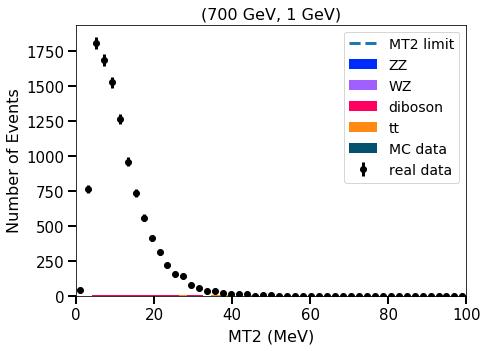

In [159]:
make_fig("MT2 (MeV)", "Number of Events")
title("(700 GeV, 1 GeV)")
#n, bins, patches = plt.hist(mt2_dbg[2][1:] + mt2_ebg[2] + [mt2_sets_ind[2]], \
                #bins, stacked = True, weights = bg_weights_ind[2] \
                #+ [f3*ewi for ewi in ebg_weights_ind[2]] + [f3*sets_weights_ind[2]])
n, bins, patches = plt.hist(np.array(mt2_dbg[2][1:] + [mt2_sets_ind[2]])/1e3, \
                bins, stacked = True, weights = bg_weights_ind[2] + [f3*sets_weights_ind[2]])
errorbar(bin_centers, counts, yerr = err, fmt = 'o', c = 'black')
ylim(bottom = 0)
axvline(np.sqrt(700**2-(mdms[2]/1e3)**2), linestyle = "--")
legend(["MT2 limit", "ZZ", "WZ", "diboson", "tt", "MC data", "real data"])
xlim(xlow, xhigh)
#savefig("mdm2plt.svg")

(0, 1000)

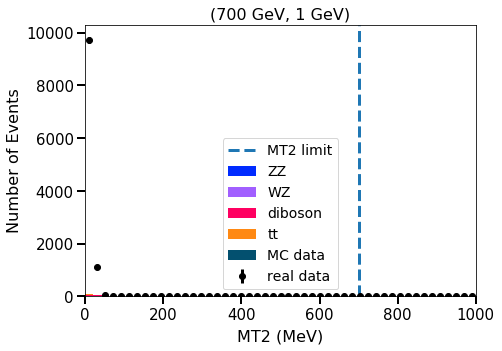

In [118]:
make_fig("MT2 (MeV)", "Number of Events")
title("(700 GeV, 1 GeV)")
#n, bins, patches = plt.hist(mt2_dbg[2][1:] + mt2_ebg[2] + [mt2_sets_ind[2]], \
                #bins, stacked = True, weights = bg_weights_ind[2] \
                #+ [f3*ewi for ewi in ebg_weights_ind[2]] + [f3*sets_weights_ind[2]])
n, bins, patches = plt.hist(np.array(mt2_dbg[2][1:] + [mt2_sets_ind[2]])/1e3, \
                bins, stacked = True, weights = bg_weights_ind[2] + [f3*sets_weights_ind[2]])
errorbar(bin_centers, counts, yerr = err, fmt = 'o', c = 'black')
ylim(bottom = 0)
axvline(np.sqrt(700**2-(mdms[2]/1e3)**2), linestyle = "--")
legend(["MT2 limit", "ZZ", "WZ", "diboson", "tt", "MC data", "real data"])
xlim(xlow, xhigh)
#savefig("mdm2plt.svg")

In [81]:
counts_b, bin_edges_b = np.histogram(mt2_bg_comb[2]/1e3, bins, weights = bg_weights_comb[2])
bin_centers_b = (bin_edges_b[:-1] + bin_edges_b[1:])/2.
err_r = np.sqrt(counts)/counts_b

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [95]:
counts_b
x = ['{:f}'.format(item) for item in counts_b]
x

['5.174111',
 '19.699176',
 '17.064294',
 '17.963071',
 '16.160847',
 '13.403513',
 '14.167567',
 '11.130532',
 '9.619282',
 '10.046562',
 '8.898361',
 '9.922342',
 '9.247750',
 '7.574770',
 '8.588746',
 '7.773683',
 '5.075775',
 '4.327695',
 '2.903909',
 '5.403854',
 '1.626292',
 '0.781833',
 '0.936754',
 '0.610290',
 '0.498904',
 '0.505800',
 '0.240445',
 '0.049058',
 '0.006663',
 '0.000000',
 '0.419251',
 '0.154514',
 '0.026196',
 '-0.111706',
 '0.000000',
 '0.108115',
 '-0.038825',
 '0.000000',
 '0.247806',
 '0.065221',
 '0.043882',
 '-0.127109',
 '0.000000',
 '0.000000',
 '0.000000',
 '0.092094',
 '0.024351',
 '0.089547',
 '0.000000']

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


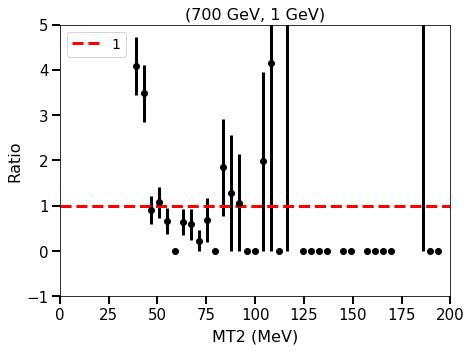

In [83]:
make_fig("MT2 (MeV)", "Ratio")
title("(700 GeV, 1 GeV)")
errorbar(bin_centers, counts/counts_b, yerr = err_r, fmt = 'o', c = "black")
axhline(1, linestyle = "--", c = "r", label = "1")
ylim((-1, 5))
xlim(0, 200)
#savefig("mdm2ratio_1.svg")
legend()

In [84]:
pvals = get_pval(counts/counts_b, err_r)

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [85]:
ind_p = np.where((abs(counts/counts_b - 1)>err_r)*(counts != 0)*(counts_b != 0))

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [86]:
(counts/counts_b)[ind_p]

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([158.28804694, 174.27125043, 162.91327154,  96.03035285,
        59.83597109,  41.63087756,  18.21060787,  15.63267637,
         7.69288174,   4.08099805,   3.48378762,   0.66008604,
         0.64319575,   0.59104278,   0.23106991])

In [87]:
array(pvals)[ind_p]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.59712260e-14, 6.68696793e-07, 3.60009929e-05, 1.24769013e-01,
       1.07408413e-01, 1.15371119e-01, 4.37838999e-04])